# ESTRATÉGIAS DE TREINO

In [1]:
# Implementação e treinamento da rede
import torch
from torch import nn, optim

# Carregamento de Dados e Modelos
from torch.utils.data import DataLoader
from torchvision import datasets, models
from torchvision import transforms

# Plots e análises
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import time, os

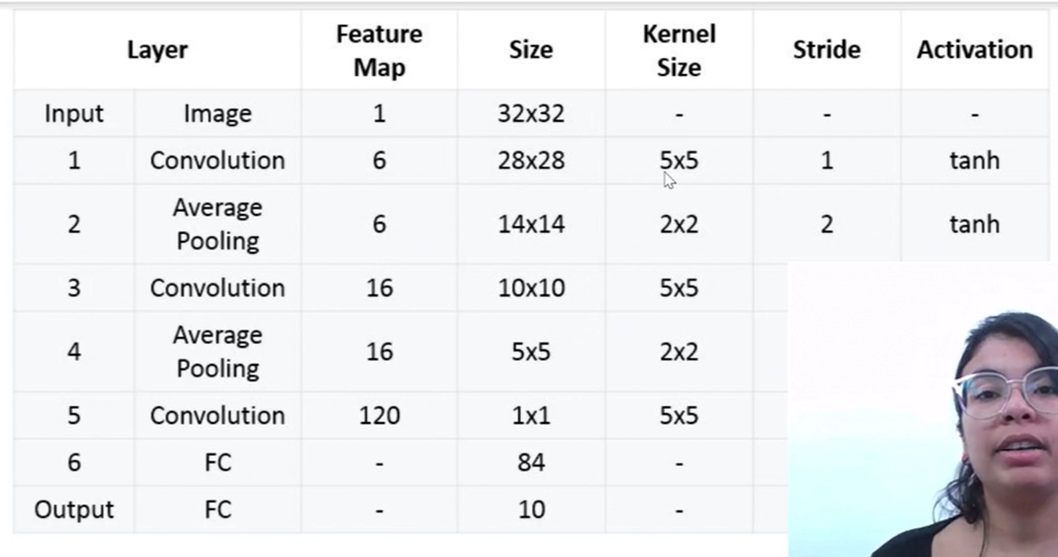

In [2]:
# LeNet5, primeira cnn bem succedida
net = nn.Sequential(
    # entrada (b, 3, 32, 32) saida (b, 6, 28, 28)
    nn.Conv2d(3, 6, kernel_size=5),
    nn.BatchNorm2d(6),
    nn.Tanh(), # Ativação especifica da lenet
    # entrada (b,3, 28, 28) saida (b, 6, 14, 14)
    nn.AvgPool2d(kernel_size=2), # Pooling especifico da leNet

    # entrada (b, 6, 14, 14) saida (b, 16, 10, 10)
    nn.Conv2d(6, 16, kernel_size=5),
    nn.BatchNorm2d(16),
    nn.Tanh(),
    # entrada (b, 16, 10, 10) saida (b, 16, 5, 5)
    nn.AvgPool2d(kernel_size=2), # Pooling especifico da leNet

    # entrada (b, 16, 5, 5) saida (b, 120, 1, 1)
    nn.Conv2d(16, 120, kernel_size=5),
    nn.BatchNorm2d(120),
    nn.Tanh(),

    # para a camada totalmente conectada, precisamos linearizar o resultado
    nn.Flatten(),

    # entrada (b, N=120*1*1) saida (b, 84)
    nn.Linear(120, 84), # esta camada tem 84 neuronios
    nn.Tanh(),

    # entrada (b, 84) saida (b, 19)
    nn.Linear(84, 10)
)

print(net)

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Tanh()
  (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Tanh()
  (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (8): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (9): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Tanh()
  (11): Flatten(start_dim=1, end_dim=-1)
  (12): Linear(in_features=120, out_features=84, bias=True)
  (13): Tanh()
  (14): Linear(in_features=84, out_features=10, bias=True)
)
